# Data Analysis


The purpose of this notebook is to analyze data from various sources.

## World Bank Data

Retrieved on 01.05.24 from: <p>https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?locations=CN-GB-US-EU and <p>
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=CN-GB-US-EU

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore FutureWarnings globally
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
country_list = ['China', 'European Union', 'United Kingdom', 'United States']
#custom_palette = ['#AC0000',  # Red 
#                  '#6F5BFF',  # Blue 
#                  '#9AC69C',  # Green 
#                  '#FF9661']  # Orange
custom_palette = ["#D62728", "#1F77B4", "#2CA02C", "#FF7F0E"]

### GDP

In [3]:
df_gdp = pd.read_excel("data/World_Bank_GDP_Data.xls")
df_gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN


In [4]:
# Filter rows based on the specific names using isin()
df_gdp = df_gdp[df_gdp['Country Name'].isin(country_list)]

# Define the range of columns to keep (starting from '2000' column)
start_year = '2000'
columns_to_keep = df_gdp.columns[df_gdp.columns >= start_year]

# Use drop() to keep only the desired columns
df_gdp = df_gdp.drop(columns=df_gdp.columns.difference(columns_to_keep))

df_gdp = df_gdp.reset_index(drop=True)


df_gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,1.211332e+12,1.339401e+12,1.470558e+12,1.660281e+12,1.955347e+12,2.285961e+12,...,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,NaN
1,European Union,EUU,GDP (current US$),NY.GDP.MKTP.CD,7.276391e+12,7.393613e+12,8.083519e+12,9.932133e+12,1.141890e+13,1.191007e+13,...,1.565116e+13,1.355368e+13,1.388851e+13,1.476554e+13,1.598099e+13,1.569343e+13,1.538117e+13,1.731522e+13,1.674654e+13,NaN
2,United Kingdom,GBR,GDP (current US$),NY.GDP.MKTP.CD,1.665535e+12,1.649827e+12,1.785730e+12,2.054423e+12,2.421525e+12,2.543180e+12,...,3.064708e+12,2.927911e+12,2.689107e+12,2.680148e+12,2.871340e+12,2.851407e+12,2.697807e+12,3.141506e+12,3.089073e+12,NaN
3,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,1.025095e+13,1.058193e+13,1.092911e+13,1.145644e+13,1.221719e+13,1.303920e+13,...,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.543970e+13,NaN


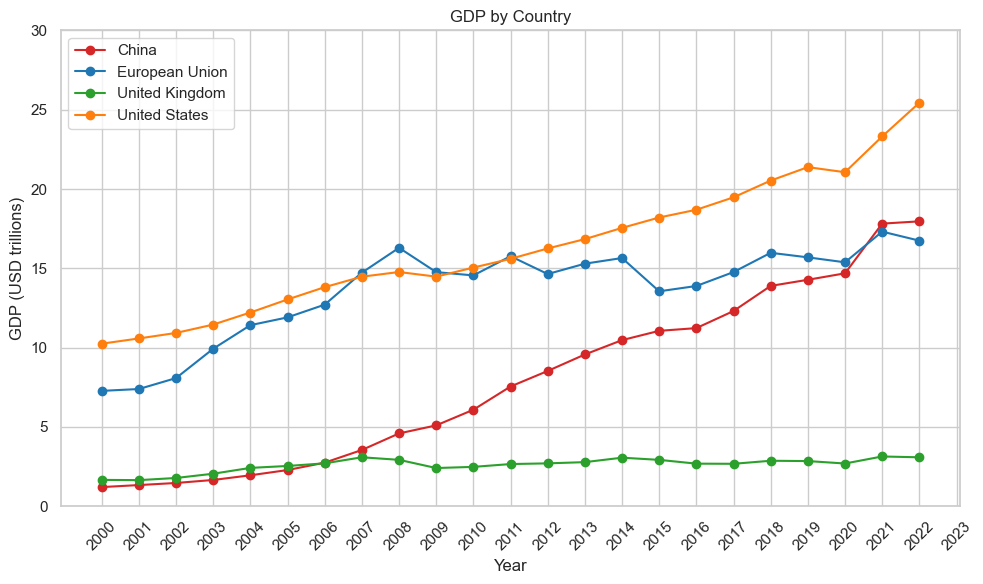

In [5]:
# Extract country names from the 'Country Name' column
countries = df_gdp['Country Name'].unique()

# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


# Iterate over each country to plot its data with a specific color
for country, color in zip(countries, custom_palette):
    country_data = df_gdp[df_gdp['Country Name'] == country]
    years = country_data.columns[4:]  # Assuming your years start from the 5th column
    values = country_data.iloc[0, 4:]  # Assuming data for the first row corresponds to the country
    
    # Plot the data for the country as a line plot with dots at each data point
    plt.plot(years, values, label=country, color=color, marker='o')  # 'o' represents a dot marker

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('GDP (USD trillions)')  # Updated y-axis label
plt.title('GDP by Country')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Update y-axis ticks and labels to show values in trillion USD
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y/10**12)}' for y in plt.yticks()[0]])  # Convert ticks to trillion USD

# Set the lower limit of the y-axis to 0
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()


### R&D

In [6]:
df_rd = pd.read_excel("data/World_Bank_R&D_Data.xls")
df_rd.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.03229,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Filter rows based on the specific names using isin()
df_rd = df_rd[df_rd['Country Name'].isin(country_list)]

# Define the range of columns to keep (starting from '2000' column)
start_year = '2000'
columns_to_keep = df_rd.columns[df_rd.columns >= start_year]

# Use drop() to keep only the desired columns
df_rd = df_rd.drop(columns=df_rd.columns.difference(columns_to_keep))

df_rd = df_rd.reset_index(drop=True)


df_rd

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,China,CHN,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,0.893160,0.940330,1.057860,1.120370,1.214980,1.307920,...,2.022430,2.057010,2.100330,2.116030,2.140580,2.244630,2.406660,2.432600,NaN,NaN
1,European Union,EUU,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,1.762884,1.821479,1.789787,1.825443,1.793621,1.781858,...,2.118068,2.118084,2.117399,2.152561,2.185303,2.223947,2.300562,2.275898,NaN,NaN
2,United Kingdom,GBR,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,1.609060,1.596580,1.613730,1.579620,1.529980,1.549050,...,2.264500,2.270270,2.311450,2.323200,2.704820,2.665520,2.931440,2.914760,NaN,NaN
3,United States,USA,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2.619840,2.637150,2.547450,2.550150,2.486860,2.501930,...,2.717860,2.787000,2.853500,2.904320,3.010100,3.170490,3.467770,3.457050,NaN,NaN


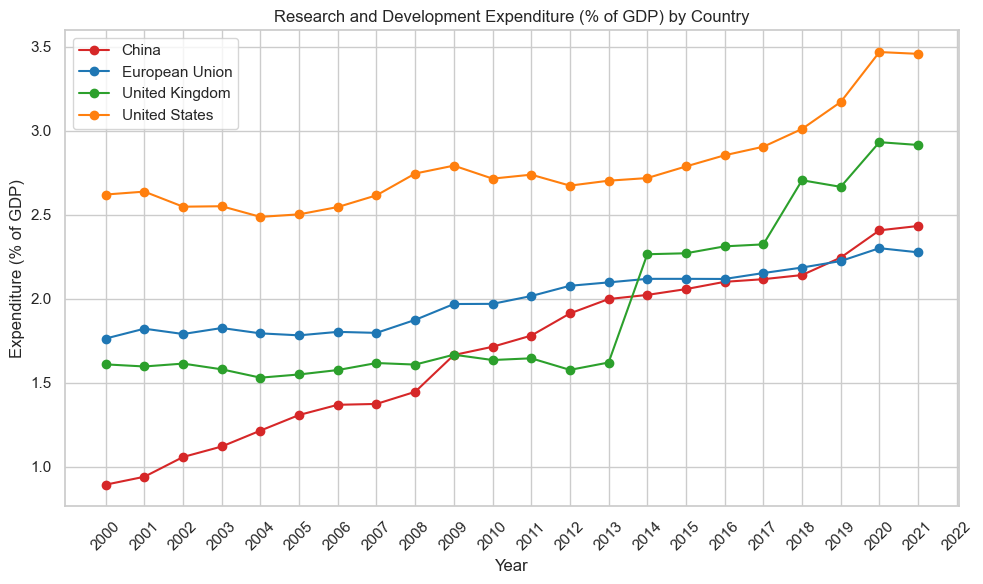

In [8]:
# Extract country names from the 'Country Name' column
countries = df_rd['Country Name'].unique()

# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Define a list of colors for each country
colors = ['red', 'blue', 'green', 'orange']  # Add more colors as needed

# Iterate over each country to plot its data with a specific color
for country, color in zip(countries, custom_palette):
    country_data = df_rd[df_rd['Country Name'] == country]
    years = country_data.columns[4:]  # Assuming your years start from the 5th column
    values = country_data.iloc[0, 4:]  # Assuming data for the first row corresponds to the country
    
    # Plot the data for the country as a line plot with dots at each data point
    plt.plot(years, values, label=country, color=color, marker='o')  # 'o' represents a dot marker

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Expenditure (% of GDP)')
plt.title('Research and Development Expenditure (% of GDP) by Country')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### R&D in USD

In [9]:
for col in df_rd.columns[4:]:
    df_rd[col] = pd.to_numeric(df_rd[col]) / 100.0  # Divide by 100 to convert percentage to decimal

# Multiplying the dataframes directly
df_product = df_gdp.iloc[:, 4:] * df_rd.iloc[:, 4:]

# Concatenate the 'Country Name' column and the calculated product dataframe
df_total_rd = pd.concat([df_gdp['Country Name'], df_product], axis=1)

# df_result now contains the product of GDP and R&D values for each year
df_total_rd = df_total_rd.drop(columns={"2022", "2023"})

df_total_rd

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,China,1.081913e+10,1.259479e+10,1.555644e+10,1.860129e+10,2.375707e+10,2.989854e+10,3.766385e+10,4.877050e+10,6.643043e+10,...,1.631473e+11,1.912046e+11,2.118622e+11,2.275376e+11,2.359367e+11,2.604937e+11,2.974316e+11,3.205325e+11,3.534841e+11,4.335005e+11
1,European Union,1.282744e+11,1.346731e+11,1.446778e+11,1.813054e+11,2.048118e+11,2.122205e+11,2.291483e+11,2.645831e+11,3.053486e+11,...,3.040704e+11,3.207243e+11,3.315021e+11,2.870782e+11,2.940753e+11,3.178373e+11,3.492331e+11,3.490136e+11,3.538535e+11,3.940768e+11
2,United Kingdom,2.679946e+10,2.634081e+10,2.881686e+10,3.245207e+10,3.704885e+10,3.939513e+10,4.266879e+10,4.997633e+10,4.710084e+10,...,4.267213e+10,4.511769e+10,6.940032e+10,6.647149e+10,6.215735e+10,6.226520e+10,7.766459e+10,7.600483e+10,7.908458e+10,9.156737e+10
3,United States,2.685584e+11,2.790614e+11,2.784137e+11,2.921564e+11,3.038245e+11,3.262316e+11,3.516689e+11,3.785242e+11,4.054046e+11,...,4.344427e+11,4.551283e+11,4.770029e+11,5.074018e+11,5.334650e+11,5.656842e+11,6.180655e+11,6.778817e+11,7.303288e+11,8.060140e+11


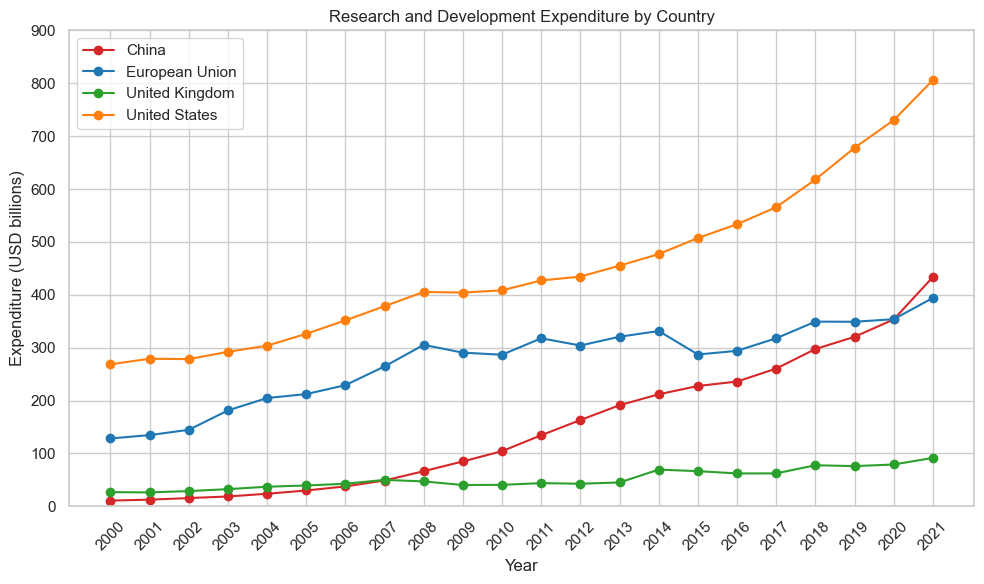

In [10]:
# Extract country names from the 'Country Name' column
countries = df_total_rd['Country Name'].unique()

# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Iterate over each country to plot its data with a specific color
for country, color in zip(countries, custom_palette):
    country_data = df_total_rd[df_total_rd['Country Name'] == country]
    years = country_data.columns[1:]  # Assuming your years start from the 5th column
    values = country_data.iloc[0, 1:]  # Assuming data for the first row corresponds to the country
    
    # Plot the data for the country as a line plot with dots at each data point
    plt.plot(years, values, label=country, color=color, marker='o')  # 'o' represents a dot marker

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Expenditure (USD billions)')
plt.title('Research and Development Expenditure by Country')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Update y-axis ticks and labels to show values in billion USD
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y/10**9)}' for y in plt.yticks()[0]])  # Convert ticks to billion USD

# Set the lower limit of the y-axis to 0
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()


## OECD.AI Data

Retrieved on 01.05.24 from: 
https://oecd.ai/en/data?selectedArea=ai-research&selectedVisualization=ai-publications-time-series-by-country 

In [11]:
df_publications = pd.read_csv("data/OECD.AI_Publication_Data.csv")
df_publications

,Year,Country,publications
0,2000,CHN,712
1,2001,CHN,890
2,2002,CHN,1269
3,2003,CHN,1658
4,2004,CHN,2131
...,...,...,...
87,2018,USA,45055
88,2019,USA,49791
89,2020,USA,52543
90,2021,USA,48056


In [12]:
df_publications['Country'] = df_publications['Country'].replace({'USA': 'United States', 'CHN': 'China', 'EU27': 'European Union', 'GBR': 'United Kingdom'})
df_publications


,Year,Country,publications
0,2000,China,712
1,2001,China,890
2,2002,China,1269
3,2003,China,1658
4,2004,China,2131
...,...,...,...
87,2018,United States,45055
88,2019,United States,49791
89,2020,United States,52543
90,2021,United States,48056


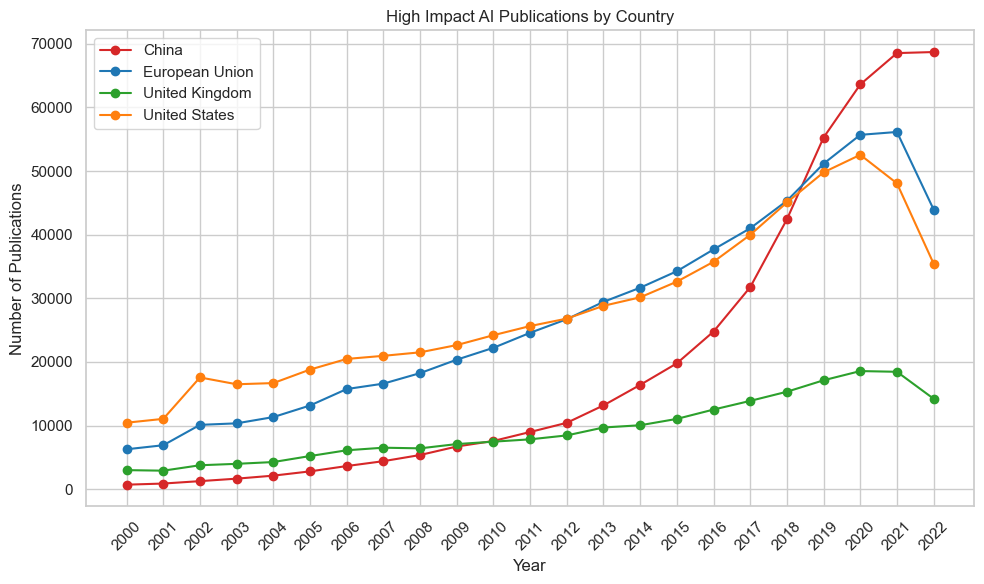

In [13]:
countries = df_publications['Country'].unique()

# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


# Iterate over each country to plot its data with a specific color
for country, color in zip(countries, custom_palette):
    country_data = df_publications[df_publications['Country'] == country]
    years = country_data['Year']
    publications = country_data['publications']
    
    # Plot the data for the country as a line plot with dots at each data point
    plt.plot(years, publications, label=country, color=color, marker='o')  # 'o' represents a dot marker

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('High Impact AI Publications by Country')

# Add a legend
plt.legend()

# Set x-axis ticks to display all years
plt.xticks(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##  Stanford University AI Index Report 2024 Data

From: <p>
Nestor Maslej, Loredana Fattorini, Raymond Perrault, Vanessa Parli, Anka Reuel, Erik Brynjolfsson, John Etchemendy, Katrina Ligett, Terah Lyons, James Manyika, Juan Carlos Niebles, Yoav Shoham, Russell Wald, and Jack Clark, “The AI Index 2024 Annual Report,” AI Index Steering Committee, Institute for Human-Centered AI, Stanford University, Stanford, CA, April 2024.

### Number of Notable ML Models

In [14]:
df_notable_models_2023 = pd.read_csv("data/Stanford_Notable_Models_Data_fig_1.3.2.csv")
df_notable_models_2023

,Number of notable machine learning models in 2023,Geographic area
0,2,Egypt
1,3,United Arab Emirates
2,3,Singapore
3,4,United Kingdom
4,4,Israel
5,4,Canada
6,5,Germany
7,8,France
8,15,China
9,61,United States


In [15]:
df_notable_models = pd.read_csv("data/Stanford_Notable_Models_Data_fig_1.3.3.csv")
df_notable_models

,Year,Number of notable machine learning models,Label
0,2003,0,China
1,2004,0,China
2,2005,0,China
3,2006,0,China
4,2007,0,China
...,...,...,...
58,2019,54,United States
59,2020,39,United States
60,2021,45,United States
61,2022,51,United States


In [16]:
df_notable_models.Label.unique()

array(['China', 'European Union and United Kingdom', 'United States'],
      dtype=object)

We can see that EU and UK are listed together here. Let us use both our dataframes to calculate the number of models released by the EU in 2023 (excluding the UK).

In [17]:
# Calculate values for EU without UK
# Filter rows where the country is 'UK'
uk_data = df_notable_models_2023[df_notable_models_2023['Geographic area'] == 'United Kingdom']
uk_value = uk_data["Number of notable machine learning models in 2023"].values[0]
print("Number of notable ML models in 2023 from the UK: " + str(uk_value))
eu_uk_data = df_notable_models[(df_notable_models['Label'] == 'European Union and United Kingdom') & (df_notable_models['Year'] == 2023)]
eu_uk_value = eu_uk_data["Number of notable machine learning models"].values[0]
print("Number of notable ML models in 2023 from the EU and the UK: " + str(eu_uk_value))
eu_value_notable = eu_uk_value - uk_value
print("Number of notable ML models in 2023 from the EU: " + str(eu_value_notable))

Number of notable ML models in 2023 from the UK: 4
Number of notable ML models in 2023 from the EU and the UK: 25
Number of notable ML models in 2023 from the EU: 21


In [18]:
# New row data
new_row = { 'Number of notable machine learning models in 2023': eu_value_notable, 'Geographic area': 'European Union'}

# Append the new row using loc
df_notable_models_2023.loc[len(df_notable_models_2023)] = new_row

In [19]:
# Filter rows based on the specific names using isin()
df_notable_models_2023 = df_notable_models_2023[df_notable_models_2023['Geographic area'].isin(country_list)]
df_notable_models_2023 = df_notable_models_2023.sort_values(by='Geographic area')
df_notable_models_2023 = df_notable_models_2023.reset_index(drop=True)
df_notable_models_2023

,Number of notable machine learning models in 2023,Geographic area
0,15,China
1,21,European Union
2,4,United Kingdom
3,61,United States


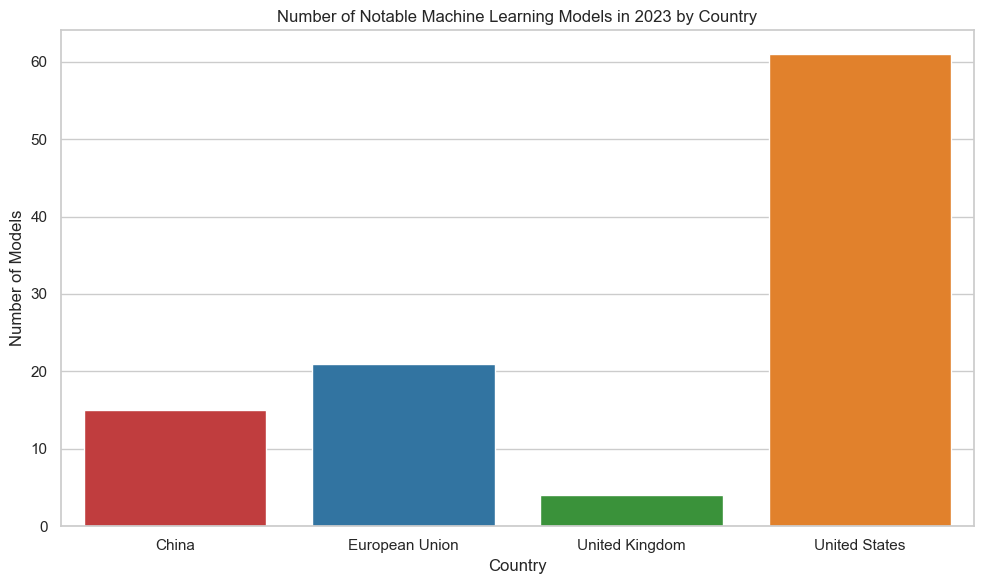

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x='Geographic area', y='Number of notable machine learning models in 2023', data=df_notable_models_2023, palette=custom_palette)

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Number of Models')
plt.title('Number of Notable Machine Learning Models in 2023 by Country')

# Show the plot
plt.tight_layout()
plt.show()

### Number of Foundation Models

In [21]:
df_foundation_models_2023 = pd.read_csv("data/Stanford_Foundation_Models_Data_fig_1.3.18.csv")
df_foundation_models_2023

,Number of foundation models,Geographic area
0,1,France
1,1,Spain
2,1,Sweden
3,1,Switzerland
4,1,Taiwan
5,2,Finland
6,2,Germany
7,2,Israel
8,2,Singapore
9,3,Canada


In [22]:
df_foundation_models = pd.read_csv("data/Stanford_Foundation_Models_Data_fig_1.3.19.csv")
df_foundation_models

,Year,Number of foundation models,Geographic area
0,2021.0,3,European Union and United Kingdom
1,2022.0,12,European Union and United Kingdom
2,2023.0,15,European Union and United Kingdom
3,2021.0,4,China
4,2022.0,6,China
5,2023.0,20,China
6,2019.0,4,United States
7,2020.0,2,United States
8,2021.0,16,United States
9,2022.0,51,United States


In [23]:
# Calculate values for EU without UK
# Filter rows where the country is 'UK'
uk_data = df_foundation_models_2023[df_foundation_models_2023['Geographic area'] == 'United Kingdom']

uk_value = uk_data["Number of foundation models"].values[0]

print("Number of foundation models in 2023 from the UK: " + str(uk_value))

eu_uk_data = df_foundation_models[(df_foundation_models['Geographic area'] == 'European Union and United Kingdom') & (df_foundation_models['Year'] == 2023)]

eu_uk_value = eu_uk_data["Number of foundation models"].values[0]

print("Number of foundation models in 2023 from the EU and the UK: " + str(eu_uk_value))

eu_value_foundation = eu_uk_value - uk_value

print("Number of foundation models in 2023 from the EU: " + str(eu_value_foundation))



Number of foundation models in 2023 from the UK: 8
Number of foundation models in 2023 from the EU and the UK: 15
Number of foundation models in 2023 from the EU: 7


In [24]:
# New row data
new_row = { 'Number of foundation models': int(eu_value_foundation), 'Geographic area': 'European Union'}

# Append the new row using loc
df_foundation_models_2023.loc[len(df_foundation_models_2023)] = new_row
df_foundation_models_2023

,Number of foundation models,Geographic area
0,1,France
1,1,Spain
2,1,Sweden
3,1,Switzerland
4,1,Taiwan
5,2,Finland
6,2,Germany
7,2,Israel
8,2,Singapore
9,3,Canada


In [25]:
# Filter rows based on the specific names using isin()
df_foundation_models_2023 = df_foundation_models_2023[df_foundation_models_2023['Geographic area'].isin(country_list)]
df_foundation_models_2023 = df_foundation_models_2023.sort_values(by='Geographic area')
df_foundation_models_2023 = df_foundation_models_2023.reset_index(drop=True)

df_foundation_models_2023

,Number of foundation models,Geographic area
0,20,China
1,7,European Union
2,8,United Kingdom
3,109,United States


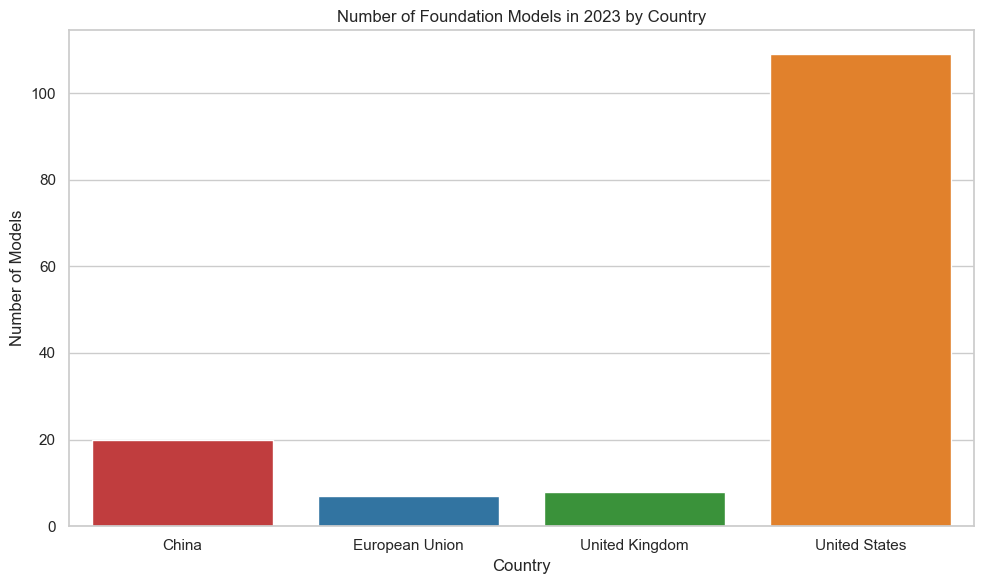

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x='Geographic area', y='Number of foundation models', data=df_foundation_models_2023, palette=custom_palette)

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Number of Models')
plt.title('Number of Foundation Models in 2023 by Country')

# Show the plot
plt.tight_layout()
plt.show()

### Total Private AI Investments

In [27]:
df_investments = pd.read_csv("data/Stanford_Total_Investments_Data_fig_4.3.10.csv")
df_investments

,Year,Total investment (in billions of U.S. dollars),Geographic Area
0,2013,0.62,China
1,2014,0.67,China
2,2015,2.09,China
3,2016,4.52,China
4,2017,6.62,China
5,2018,13.97,China
6,2019,14.05,China
7,2020,16.36,China
8,2021,23.08,China
9,2022,13.91,China


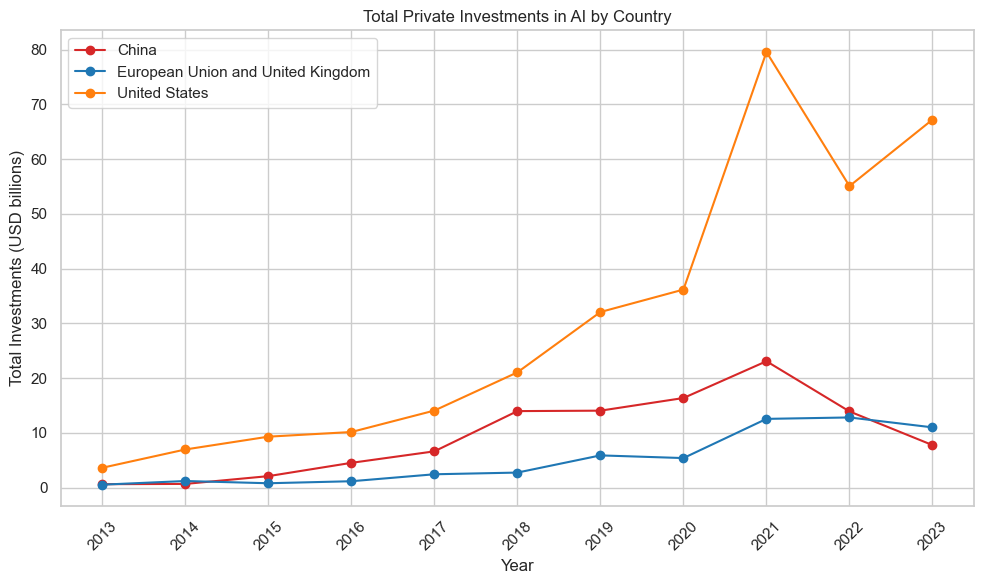

In [28]:
# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


countries = df_investments['Geographic Area'].unique()

# Iterate over each geographic area to plot its data with a specific color
for area, color in zip(countries, custom_palette):
    area_data = df_investments[df_investments['Geographic Area'] == area]
    years = area_data['Year']
    investments = area_data['Total investment (in billions of U.S. dollars)']
    
    if(area == 'United States'):
        plt.plot(years, investments, label=area, color=custom_palette[3], marker='o')

    else:
        # Plot the data for the geographic area as a line plot with dots at each data point
        plt.plot(years, investments, label=area, color=color, marker='o')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Investments (USD billions)')
plt.title('Total Private Investments in AI by Country')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Newly Funded AI Companies

In [29]:
df_companies = pd.read_csv("data/Stanford_New_Companies_Data_fig_4.3.14.csv")
df_companies

,Year,Number of newly funded AI companies,Geographic area
0,2013,27,China
1,2014,43,China
2,2015,72,China
3,2016,69,China
4,2017,92,China
5,2018,205,China
6,2019,217,China
7,2020,192,China
8,2021,260,China
9,2022,147,China


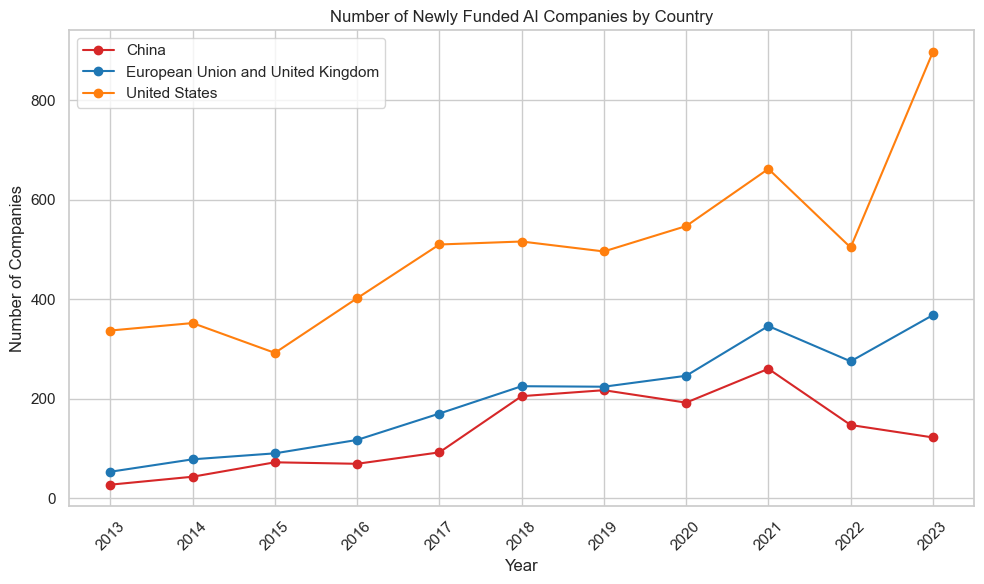

In [30]:
# Set the figure size and style using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

countries = df_companies['Geographic area'].unique()
# Iterate over each geographic area to plot its data with a specific color
for area, color in zip(countries, custom_palette):
    area_data = df_companies[df_companies['Geographic area'] == area]
    years = area_data['Year']
    companies = area_data['Number of newly funded AI companies']
    
    
    if(area == 'United States'):
        plt.plot(years, companies, label=area, color=custom_palette[3], marker='o')

    else:
        # Plot the data for the geographic area as a line plot with dots at each data point
        plt.plot(years, companies, label=area, color=color, marker='o')
    

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Newly Funded AI Companies by Country')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Combining the Sources

Now, we combine the most recent data from the AI-related statistics for each country.

In [31]:
df_combined = pd.DataFrame(columns=['Country', 'Publications (2022)', 'Notable Models', 'Foundation Models', 'VC Investments', 'Total Investments', 'Number of Newly Funded Companies'])
df_combined

,Country,Publications (2022),Notable Models,Foundation Models,VC Investments,Total Investments,Number of Newly Funded Companies


#### VC Investments

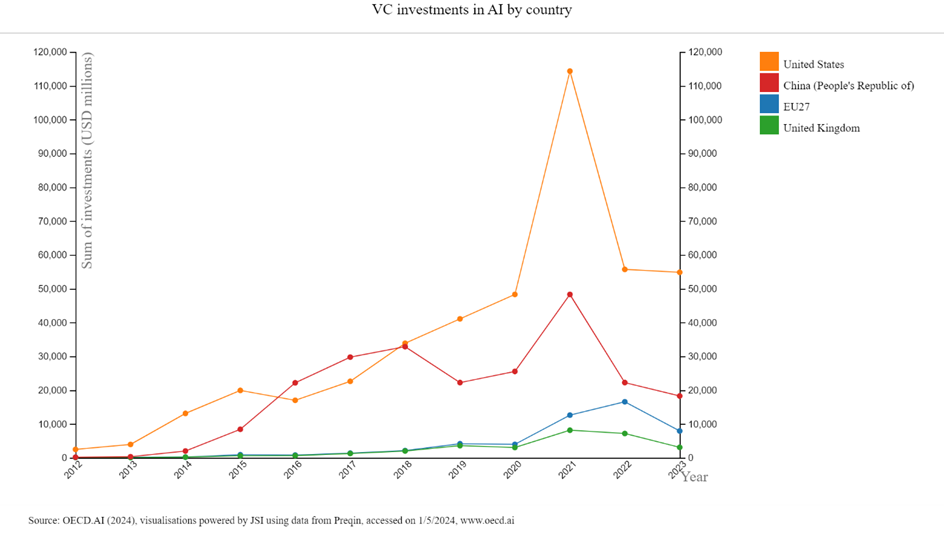

Unfortunately, we do not have the underlying data of the graph shown above. Therefore, we approximate the values using the interactive tool that is accessible using the following code (quotation marks need to be removed):

In [32]:
"""
import matplotlib.image as mpimg

# Set the backend to TkAgg for interactive features
plt.switch_backend('TkAgg')

# Load the plot image
img = mpimg.imread('data/OECD.AI_Start_Up_Data.png')  # Replace 'path_to_your_plot_image.png' with your image path

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axes for better visualization

# Use plt.ginput() to interactively measure points on the plot
points = plt.ginput(n=-1, timeout=-1)  # Use n=-1 for unlimited points, timeout=-1 for no timeout

# Print the coordinates of measured points
print("Measured Points:")
for point in points:
    print(f"x: {point[0]}, y: {point[1]}")

# Show the plot
plt.show()
"""

'\nimport matplotlib.image as mpimg\n\n# Set the backend to TkAgg for interactive features\nplt.switch_backend(\'TkAgg\')\n\n# Load the plot image\nimg = mpimg.imread(\'data/OECD.AI_Start_Up_Data.png\')  # Replace \'path_to_your_plot_image.png\' with your image path\n\n# Display the image\nplt.imshow(img)\nplt.axis(\'off\')  # Turn off axes for better visualization\n\n# Use plt.ginput() to interactively measure points on the plot\npoints = plt.ginput(n=-1, timeout=-1)  # Use n=-1 for unlimited points, timeout=-1 for no timeout\n\n# Print the coordinates of measured points\nprint("Measured Points:")\nfor point in points:\n    print(f"x: {point[0]}, y: {point[1]}")\n\n# Show the plot\nplt.show()\n'

#### Approximated VC/start-up investments in 2023:
China: 18 million USD<br>
EU: 8 million USD<br>
UK: 3 million USD<br>
US: 55 million USD
    
   


In [33]:
# Sample data
data = {
    'Country': country_list,
    'VC Investments': [18, 8, 3, 55],
}
df_vc = pd.DataFrame(data)
df_vc

,Country,VC Investments
0,China,18
1,European Union,8
2,United Kingdom,3
3,United States,55


#### Total Investments

In [34]:
df_investments_2023 = pd.read_csv("data/Stanford_Total_Investments_Data_fig_4.3.8.csv")
df_investments_2023.head(5)

,Total investment (in billions of U.S. dollars),Geographic area
0,0.36,Spain
1,0.37,Australia
2,0.41,United Arab Emirates
3,0.68,Japan
4,1.14,Singapore


In [35]:
# Calculate values for EU without UK
# Filter rows where the country is 'UK'
uk_data = df_investments_2023[df_investments_2023['Geographic area'] == 'United Kingdom']
uk_value = uk_data["Total investment (in billions of U.S. dollars)"].values[0]
print("Total investment (in billions of U.S. dollars) in 2023 from the UK: " + str(uk_value))
eu_uk_data = df_investments[(df_investments['Geographic Area'] == 'European Union and United Kingdom') & (df_investments['Year'] == 2023)]
eu_uk_value = eu_uk_data["Total investment (in billions of U.S. dollars)"].values[0]
print("Total investment (in billions of U.S. dollars) in 2023 from the EU and the UK: " + str(eu_uk_value))
eu_value_investments = eu_uk_value - uk_value
print("Total investment (in billions of U.S. dollars) in 2023 from the EU: " + str(eu_value_investments))

Total investment (in billions of U.S. dollars) in 2023 from the UK: 3.78
Total investment (in billions of U.S. dollars) in 2023 from the EU and the UK: 11.0
Total investment (in billions of U.S. dollars) in 2023 from the EU: 7.220000000000001


In [36]:
# New row data
new_row = { 'Total investment (in billions of U.S. dollars)': eu_value_investments, 'Geographic area': 'European Union'}

# Append the new row using loc
df_investments_2023.loc[len(df_investments_2023)] = new_row

# Filter rows based on the specific names using isin()
df_investments_2023 = df_investments_2023[df_investments_2023['Geographic area'].isin(country_list)]
df_investments_2023 = df_investments_2023.sort_values(by='Geographic area')
df_investments_2023 = df_investments_2023.reset_index(drop=True)

df_investments_2023

,Total investment (in billions of U.S. dollars),Geographic area
0,7.76,China
1,7.22,European Union
2,3.78,United Kingdom
3,67.22,United States


#### Newly Funded Companies

In [37]:
df_companies_2023 = pd.read_csv("data/Stanford_New_Companies_Data_fig_4.3.12.csv")
df_companies_2023.head(5)

,Number of newly funded companies,Geographic area
0,15,Brazil
1,17,Switzerland
2,21,Spain
3,24,Australia
4,29,Singapore


In [38]:
# Calculate values for EU without UK
# Filter rows where the country is 'UK'
uk_data = df_companies_2023[df_companies_2023['Geographic area'] == 'United Kingdom']
uk_value = uk_data["Number of newly funded companies"].values[0]
print("Number of newly funded companies in 2023 from the UK: " + str(uk_value))
eu_uk_data = df_companies[(df_companies['Geographic area'] == 'European Union and United Kingdom') & (df_companies['Year'] == 2023)]
eu_uk_value = eu_uk_data["Number of newly funded AI companies"].values[0]
print("Number of newly funded companies in 2023 from the EU and the UK: " + str(eu_uk_value))
eu_value_companies = eu_uk_value - uk_value
print("Number of newly funded companies in 2023 from the EU: " + str(eu_value_companies))

Number of newly funded companies in 2023 from the UK: 104
Number of newly funded companies in 2023 from the EU and the UK: 368
Number of newly funded companies in 2023 from the EU: 264


In [39]:
# New row data
new_row = { 'Number of newly funded companies': eu_value_companies, 'Geographic area': 'European Union'}

# Append the new row using loc
df_companies_2023.loc[len(df_companies_2023)] = new_row

# Filter rows based on the specific names using isin()
df_companies_2023 = df_companies_2023[df_companies_2023['Geographic area'].isin(country_list)]
df_companies_2023 = df_companies_2023.sort_values(by='Geographic area')
df_companies_2023 = df_companies_2023.reset_index(drop=True)

df_companies_2023

,Number of newly funded companies,Geographic area
0,122,China
1,264,European Union
2,104,United Kingdom
3,897,United States


#### Combine Data

In [40]:
def fetch_recent_data(country):

    # Filter rows where the country is 'UK'
    publication_data = df_publications[df_publications['Country'] == country] 
    publication_value = publication_data["publications"].values[len(publication_data)-1]
    
    notable_models_data = df_notable_models_2023[df_notable_models_2023['Geographic area'] == country] 
    notable_models_value = notable_models_data["Number of notable machine learning models in 2023"].values[len(notable_models_data)-1]

    foundation_models_data = df_foundation_models_2023[df_foundation_models_2023['Geographic area'] == country] 
    foundation_models_value = foundation_models_data["Number of foundation models"].values[len(foundation_models_data)-1]
    
    vc_data = df_vc[df_vc['Country'] == country]
    vc_value = vc_data["VC Investments"].values[len(vc_data)-1]
    
    investments_data = df_investments_2023[df_investments_2023['Geographic area'] == country]
    investments_value = investments_data["Total investment (in billions of U.S. dollars)"].values[len(investments_data)-1]
    
    
    companies_data = df_companies_2023[df_companies_2023['Geographic area'] == country]
    companies_value = companies_data["Number of newly funded companies"].values[len(companies_data)-1]
    

    new_row = (country,publication_value , notable_models_value, foundation_models_value, vc_value, investments_value, companies_value)

    # Append the new row to the DataFrame
    df_combined.loc[len(df_combined)] = new_row

In [41]:
for country in country_list:
    
    fetch_recent_data(country)

df_combined

,Country,Publications (2022),Notable Models,Foundation Models,VC Investments,Total Investments,Number of Newly Funded Companies
0,China,68692,15,20,18,7.76,122
1,European Union,43943,21,7,8,7.22,264
2,United Kingdom,14211,4,8,3,3.78,104
3,United States,35437,61,109,55,67.22,897


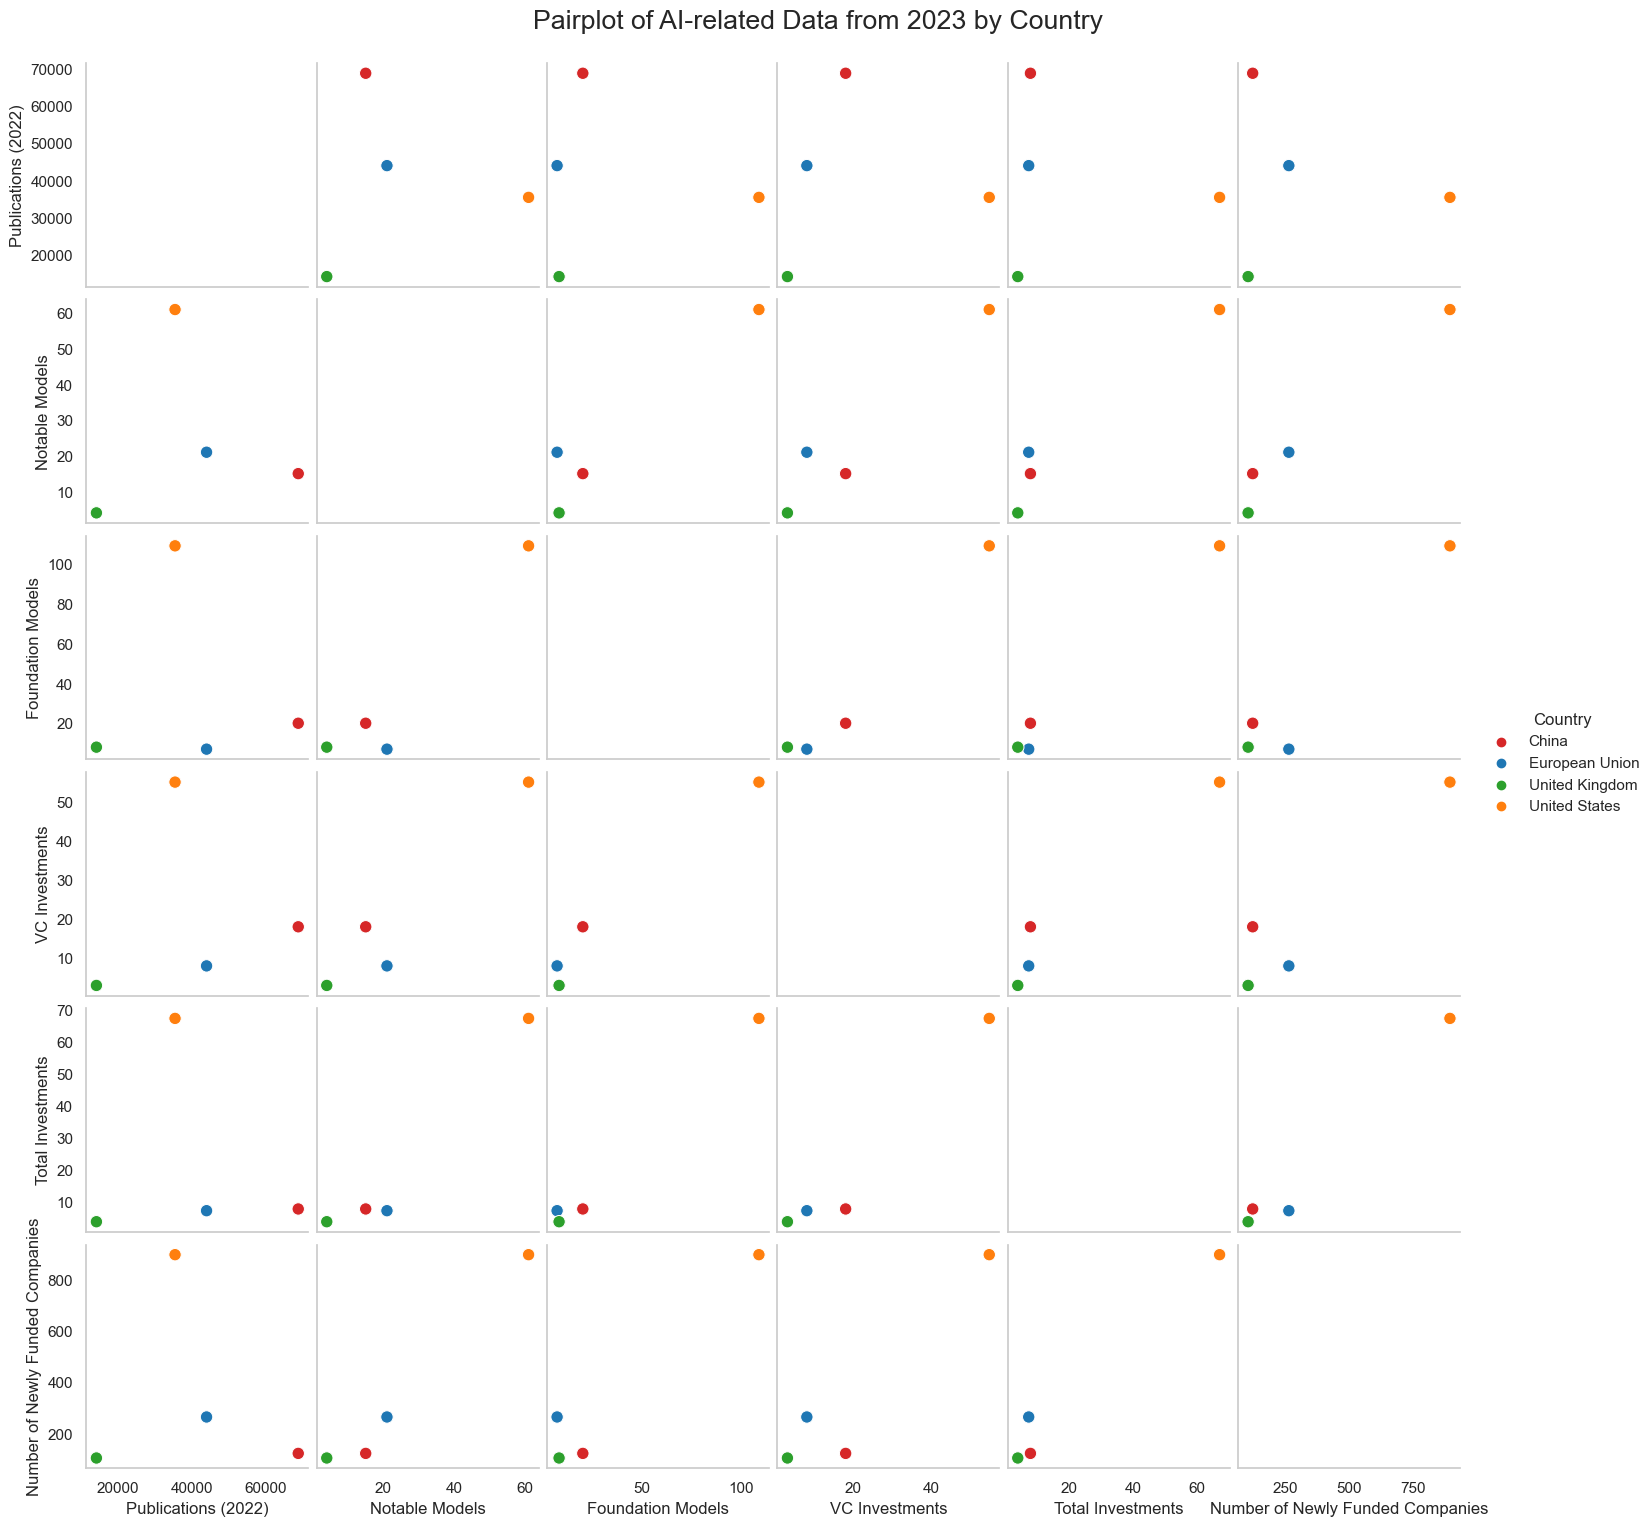

In [42]:
sns.set_palette(custom_palette)


sns.set_style("whitegrid", {'axes.grid' : False})

sns.pairplot(df_combined, hue='Country', palette=custom_palette, plot_kws={'s': 80})


plt.rcParams.update({'font.size': 16})  # Adjust the font size as needed


plt.suptitle('Pairplot of AI-related Data from 2023 by Country', y=1.02)  # Adjust y position for vertical placement


# Show the plot
plt.show()